#  **Data Understanding**

In [1]:
pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.8 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=18d6465ef7f82e0fdee430bee50c1b95f829f7603804975521ffe03d41c09863
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [2]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
from cleantext import clean
import emoji
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re

In [4]:
data_raw=pd.read_csv("datasc.csv")
data_raw

FileNotFoundError: ignored

In [ ]:
print(len(data_raw))

In [ ]:
data_raw.describe()

In [ ]:
data_raw.info()

In [ ]:
data_raw.isna().sum()

In [ ]:
data_raw['job_title'].value_counts()

# **Data Preparation**

In [ ]:
data_raw = data_raw.drop('work', axis=1)
data_raw = data_raw.drop('place', axis=1)
data_raw = data_raw.drop('time', axis=1)
data_raw = data_raw.drop('name', axis=1)
data_raw.dropna(subset=['company'], inplace=True)
#TO TEST data_raw.drop_duplicates(keep='first', inplace=True)
#TO TEST data_raw.drop_duplicates(subset=['job_title', 'company'], keep=True, inplace=True)

In [ ]:
print(len(data_raw))

7567


In [ ]:
data_raw['job'] = data_raw['job_title'].map(lambda x: re.sub('[,\.!?]()', '', x))

In [ ]:
data_raw['job'] = data_raw['job'].map(lambda x: x.lower())

In [ ]:
html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
data_raw['job'] = data_raw['job'].apply(lambda x: re.sub(html,'', x))

In [ ]:
data_raw['job'] = data_raw['job'].apply(lambda x: re.sub('\n','', x))

In [ ]:
data_raw['job'].sample(10)

7496                                                stage
3721                                  data science intern
6941                                            assistant
6625                                stage de fin d’études
3328                         consultant assurance qualité
2362                                    consultant senior
1501                                             training
6108    objectif ia : initiez-vous à l'intelligence ar...
6162    vice president chargé programme et relations e...
5235                              graduate student intern
Name: job, dtype: object

In [ ]:
data_raw = data_raw.drop('job_title', axis=1)
data_raw

,work_location,education,company,job
0,"Tunis, Gouvernorat Tunis, Tunisie",Vous avez étudié tou(te)s les deux à Ecole Sup...,VERMEG for Banking & Insurance Software · CDD,software programmer
1,"Tunis, Gouvernorat Tunis, Tunisie",Vous avez étudié tou(te)s les deux à Ecole Sup...,Consulting @ Logiciels & Systèmes · Stage,web developer internship
2,"Tunis, Gouvernorat Tunis, Tunisie",Vous avez étudié tou(te)s les deux à Ecole Sup...,RBB Africa · Stage,web developer
3,"La Marsa, Gouvernorat Tunis, Tunisie",Ecole Supérieure Privée d'Ingénierie et de Tec...,VERMEG for Banking & Insurance Software · Cont...,software developer
4,"Dar Chaabane, Gouvernorat Nabeul, Tunisie",Vous avez étudié tou(te)s les deux à Institut ...,VERMEG for Banking & Insurance Software,software development engineer
...,...,...,...,...
8174,"Gouvernorat Tunis, Tunisie",IHEC Carthage,KING INFORMATIQUE,responsable service clients
8175,"Gouvernorat Tunis, Tunisie",IHEC Carthage,IHEC Carthage,enseignante
8176,"Gouvernorat Tunis, Tunisie",IHEC Carthage,ELENTICA,vice-présidente
8177,"Gouvernorat Tunis, Tunisie",IHEC Carthage,Elhiwar Ettounsi,coach


In [ ]:
# Use a boolean mask to select only the rows that contain the target words in the "job" column
mask = data_raw["job"].str.contains("membre|étudiant|student|member")

# Delete the selected rows from the DataFrame
data_raw = data_raw[~mask]
data_raw

,work_location,education,company,job
0,"Tunis, Gouvernorat Tunis, Tunisie",Vous avez étudié tou(te)s les deux à Ecole Sup...,VERMEG for Banking & Insurance Software · CDD,software programmer
1,"Tunis, Gouvernorat Tunis, Tunisie",Vous avez étudié tou(te)s les deux à Ecole Sup...,Consulting @ Logiciels & Systèmes · Stage,web developer internship
2,"Tunis, Gouvernorat Tunis, Tunisie",Vous avez étudié tou(te)s les deux à Ecole Sup...,RBB Africa · Stage,web developer
3,"La Marsa, Gouvernorat Tunis, Tunisie",Ecole Supérieure Privée d'Ingénierie et de Tec...,VERMEG for Banking & Insurance Software · Cont...,software developer
4,"Dar Chaabane, Gouvernorat Nabeul, Tunisie",Vous avez étudié tou(te)s les deux à Institut ...,VERMEG for Banking & Insurance Software,software development engineer
...,...,...,...,...
8174,"Gouvernorat Tunis, Tunisie",IHEC Carthage,KING INFORMATIQUE,responsable service clients
8175,"Gouvernorat Tunis, Tunisie",IHEC Carthage,IHEC Carthage,enseignante
8176,"Gouvernorat Tunis, Tunisie",IHEC Carthage,ELENTICA,vice-présidente
8177,"Gouvernorat Tunis, Tunisie",IHEC Carthage,Elhiwar Ettounsi,coach


In [ ]:
print(len(data_raw))

7192


In [ ]:
# Use a boolean mask to select only the rows that contain the target words in the "company" column
mask = data_raw["company"].str.lower().str.contains("association|club|membre|étudiant|student|member|esprit|freelance")

# Delete the selected rows from the DataFrame
data_raw = data_raw[~mask]
data_raw

,work_location,education,company,job
0,"Tunis, Gouvernorat Tunis, Tunisie",Vous avez étudié tou(te)s les deux à Ecole Sup...,VERMEG for Banking & Insurance Software · CDD,software programmer
1,"Tunis, Gouvernorat Tunis, Tunisie",Vous avez étudié tou(te)s les deux à Ecole Sup...,Consulting @ Logiciels & Systèmes · Stage,web developer internship
2,"Tunis, Gouvernorat Tunis, Tunisie",Vous avez étudié tou(te)s les deux à Ecole Sup...,RBB Africa · Stage,web developer
3,"La Marsa, Gouvernorat Tunis, Tunisie",Ecole Supérieure Privée d'Ingénierie et de Tec...,VERMEG for Banking & Insurance Software · Cont...,software developer
4,"Dar Chaabane, Gouvernorat Nabeul, Tunisie",Vous avez étudié tou(te)s les deux à Institut ...,VERMEG for Banking & Insurance Software,software development engineer
...,...,...,...,...
8174,"Gouvernorat Tunis, Tunisie",IHEC Carthage,KING INFORMATIQUE,responsable service clients
8175,"Gouvernorat Tunis, Tunisie",IHEC Carthage,IHEC Carthage,enseignante
8176,"Gouvernorat Tunis, Tunisie",IHEC Carthage,ELENTICA,vice-présidente
8177,"Gouvernorat Tunis, Tunisie",IHEC Carthage,Elhiwar Ettounsi,coach


In [ ]:
print(len(data_raw))

6735


In [ ]:
# Use a boolean mask to select only the rows that contain the target words in the "education" column
mask = data_raw["education"].str.lower().str.contains("membre|member|freelance")

# Delete the selected rows from the DataFrame
data_raw = data_raw[~mask]
data_raw

,work_location,education,company,job
0,"Tunis, Gouvernorat Tunis, Tunisie",Vous avez étudié tou(te)s les deux à Ecole Sup...,VERMEG for Banking & Insurance Software · CDD,software programmer
1,"Tunis, Gouvernorat Tunis, Tunisie",Vous avez étudié tou(te)s les deux à Ecole Sup...,Consulting @ Logiciels & Systèmes · Stage,web developer internship
2,"Tunis, Gouvernorat Tunis, Tunisie",Vous avez étudié tou(te)s les deux à Ecole Sup...,RBB Africa · Stage,web developer
3,"La Marsa, Gouvernorat Tunis, Tunisie",Ecole Supérieure Privée d'Ingénierie et de Tec...,VERMEG for Banking & Insurance Software · Cont...,software developer
4,"Dar Chaabane, Gouvernorat Nabeul, Tunisie",Vous avez étudié tou(te)s les deux à Institut ...,VERMEG for Banking & Insurance Software,software development engineer
...,...,...,...,...
8174,"Gouvernorat Tunis, Tunisie",IHEC Carthage,KING INFORMATIQUE,responsable service clients
8175,"Gouvernorat Tunis, Tunisie",IHEC Carthage,IHEC Carthage,enseignante
8176,"Gouvernorat Tunis, Tunisie",IHEC Carthage,ELENTICA,vice-présidente
8177,"Gouvernorat Tunis, Tunisie",IHEC Carthage,Elhiwar Ettounsi,coach


In [ ]:
print(len(data_raw))

6730


In [ ]:
data_raw['company'] = data_raw['company'].str.replace('CDI', '')
data_raw['company'] = data_raw['company'].str.replace('CDD', '')
data_raw['company'] = data_raw['company'].str.replace('Temps plein', '')
data_raw['company'] = data_raw['company'].str.lower().str.replace('stage', '')

data_raw

<ipython-input-84-5f14fa7ac42e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['company'] = data_raw['company'].str.replace('CDI', '')
<ipython-input-84-5f14fa7ac42e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['company'] = data_raw['company'].str.replace('CDD', '')
<ipython-input-84-5f14fa7ac42e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,work_location,education,company,job
0,"Tunis, Tunisia",ESPRIT,vermeg for banking & insurance software ·,software programmer
1,"Tunis, Tunisia",ESPRIT,consulting @ logiciels & systèmes ·,web developer internship
2,"Tunis, Tunisia",ESPRIT,rbb africa ·,web developer
3,"La Marsa, Tunisia",ESPRIT,vermeg for banking & insurance software · cont...,software developer
4,"Dar Chaabane, Nabeul, Tunisia",ESPRIT,vermeg for banking & insurance software,software development engineer
...,...,...,...,...
8174,Tunisia,IHEC Carthage,king informatique,responsable service clients
8175,Tunisia,IHEC Carthage,ihec carthage,enseignante
8176,Tunisia,IHEC Carthage,elentica,vice présidente
8177,Tunisia,IHEC Carthage,elhiwar ettounsi,coach


In [ ]:
data_raw['work_location'] = data_raw['work_location'].str.replace('Gouvernorat', '')
data_raw['work_location'] = data_raw['work_location'].str.replace('Tunisie', 'Tunisia')
data_raw['work_location'] = data_raw['work_location'].str.replace('Tunis, Tunis', 'Tunis')
data_raw

<ipython-input-57-809b1ed233a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['work_location'] = data_raw['work_location'].str.replace('Gouvernorat', '')
<ipython-input-57-809b1ed233a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['work_location'] = data_raw['work_location'].str.replace('Tunisie', 'Tunisia')
<ipython-input-57-809b1ed233a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,work_location,education,company,job
0,"Tunis, Tunisia",Vous avez étudié tou(te)s les deux à Ecole Sup...,VERMEG for Banking & Insurance Software ·,software programmer
1,"Tunis, Tunisia",Vous avez étudié tou(te)s les deux à Ecole Sup...,Consulting @ Logiciels & Systèmes · Stage,web developer internship
2,"Tunis, Tunisia",Vous avez étudié tou(te)s les deux à Ecole Sup...,RBB Africa · Stage,web developer
3,"La Marsa, Tunisia",Ecole Supérieure Privée d'Ingénierie et de Tec...,VERMEG for Banking & Insurance Software · Cont...,software developer
4,"Dar Chaabane, Nabeul, Tunisia",Vous avez étudié tou(te)s les deux à Institut ...,VERMEG for Banking & Insurance Software,software development engineer
...,...,...,...,...
8174,Tunisia,IHEC Carthage,KING INFORMATIQUE,responsable service clients
8175,Tunisia,IHEC Carthage,IHEC Carthage,enseignante
8176,Tunisia,IHEC Carthage,ELENTICA,vice-présidente
8177,Tunisia,IHEC Carthage,Elhiwar Ettounsi,coach


In [ ]:
data_raw['work_location'] = data_raw['work_location'].str.replace('Tunis, Tunis', 'Tunis')
data_raw

<ipython-input-58-8122d8612840>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['work_location'] = data_raw['work_location'].str.replace('Tunis, Tunis', 'Tunis')


,work_location,education,company,job
0,"Tunis, Tunisia",Vous avez étudié tou(te)s les deux à Ecole Sup...,VERMEG for Banking & Insurance Software ·,software programmer
1,"Tunis, Tunisia",Vous avez étudié tou(te)s les deux à Ecole Sup...,Consulting @ Logiciels & Systèmes · Stage,web developer internship
2,"Tunis, Tunisia",Vous avez étudié tou(te)s les deux à Ecole Sup...,RBB Africa · Stage,web developer
3,"La Marsa, Tunisia",Ecole Supérieure Privée d'Ingénierie et de Tec...,VERMEG for Banking & Insurance Software · Cont...,software developer
4,"Dar Chaabane, Nabeul, Tunisia",Vous avez étudié tou(te)s les deux à Institut ...,VERMEG for Banking & Insurance Software,software development engineer
...,...,...,...,...
8174,Tunisia,IHEC Carthage,KING INFORMATIQUE,responsable service clients
8175,Tunisia,IHEC Carthage,IHEC Carthage,enseignante
8176,Tunisia,IHEC Carthage,ELENTICA,vice-présidente
8177,Tunisia,IHEC Carthage,Elhiwar Ettounsi,coach


In [ ]:
data_raw['education'].value_counts()

You both studied at Ecole Supérieure Privée d'Ingénierie et de Technologies - ESPRIT                                                          1497
Vous avez étudié tou(te)s les deux à Ecole Supérieure Privée d'Ingénierie et de Technologies - ESPRIT                                         1465
Ecole Supérieure Privée d'Ingénierie et de Technologies - ESPRIT                                                                               875
Vous avez travaillé tous les deux chez Tunisie Telecom                                                                                         178
Esprit School of Business                                                                                                                      152
                                                                                                                                              ... 
Commerce                                                                                                              

In [ ]:
for ind in data_raw.index:
    if "ESPRIT" in data_raw['education'][ind]:
        data_raw['education'][ind]="ESPRIT"
data_raw


<ipython-input-60-79113ca2f335>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['education'][ind]="ESPRIT"


,work_location,education,company,job
0,"Tunis, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software ·,software programmer
1,"Tunis, Tunisia",ESPRIT,Consulting @ Logiciels & Systèmes · Stage,web developer internship
2,"Tunis, Tunisia",ESPRIT,RBB Africa · Stage,web developer
3,"La Marsa, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software · Cont...,software developer
4,"Dar Chaabane, Nabeul, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software,software development engineer
...,...,...,...,...
8174,Tunisia,IHEC Carthage,KING INFORMATIQUE,responsable service clients
8175,Tunisia,IHEC Carthage,IHEC Carthage,enseignante
8176,Tunisia,IHEC Carthage,ELENTICA,vice-présidente
8177,Tunisia,IHEC Carthage,Elhiwar Ettounsi,coach


In [ ]:
data_raw['job'].value_counts()

stagiaire                                                 469
intern                                                    100
software developer                                         97
développeur web                                            82
software engineer                                          81
                                                         ... 
ceo & fondateur hoteltunisietn                              1
développeur web - stage d'été                               1
stage extra formation                                       1
ingénieur développement des systèmes mobiles  à hadrum      1
enseignante                                                 1
Name: job, Length: 3256, dtype: int64

In [ ]:
data_raw['job'].sample(10)

6294                                 stagiaire ingénierie
6065                                   software developer
5060                                     agent commercial
7592              développeur front-end & cordova plugins
56                                          web developer
950     observatrice nationale des éléctions législati...
1322                            deputy head of production
4148                                            stagiaire
1248                                          commerciale
7088                                        summer intern
Name: job, dtype: object

In [ ]:
#replacing emojis with ''
for ind in data_raw.index:
    data_raw['job'][ind]=emoji.replace_emoji(data_raw['job'][ind], replace='')
data_raw

<ipython-input-63-5d75e106eb5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['job'][ind]=emoji.replace_emoji(data_raw['job'][ind], replace='')


,work_location,education,company,job
0,"Tunis, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software ·,software programmer
1,"Tunis, Tunisia",ESPRIT,Consulting @ Logiciels & Systèmes · Stage,web developer internship
2,"Tunis, Tunisia",ESPRIT,RBB Africa · Stage,web developer
3,"La Marsa, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software · Cont...,software developer
4,"Dar Chaabane, Nabeul, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software,software development engineer
...,...,...,...,...
8174,Tunisia,IHEC Carthage,KING INFORMATIQUE,responsable service clients
8175,Tunisia,IHEC Carthage,IHEC Carthage,enseignante
8176,Tunisia,IHEC Carthage,ELENTICA,vice-présidente
8177,Tunisia,IHEC Carthage,Elhiwar Ettounsi,coach


In [ ]:
#replacing emojis with ''
for ind in data_raw.index:
    data_raw['education'][ind]=emoji.replace_emoji(data_raw['education'][ind], replace='')
data_raw

<ipython-input-64-abe2ebb8fc9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['education'][ind]=emoji.replace_emoji(data_raw['education'][ind], replace='')


,work_location,education,company,job
0,"Tunis, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software ·,software programmer
1,"Tunis, Tunisia",ESPRIT,Consulting @ Logiciels & Systèmes · Stage,web developer internship
2,"Tunis, Tunisia",ESPRIT,RBB Africa · Stage,web developer
3,"La Marsa, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software · Cont...,software developer
4,"Dar Chaabane, Nabeul, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software,software development engineer
...,...,...,...,...
8174,Tunisia,IHEC Carthage,KING INFORMATIQUE,responsable service clients
8175,Tunisia,IHEC Carthage,IHEC Carthage,enseignante
8176,Tunisia,IHEC Carthage,ELENTICA,vice-présidente
8177,Tunisia,IHEC Carthage,Elhiwar Ettounsi,coach


In [ ]:
#replacing emojis with ''
for ind in data_raw.index:
    data_raw['company'][ind]=emoji.replace_emoji(data_raw['company'][ind], replace='')
data_raw

<ipython-input-65-49d71ff29d32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['company'][ind]=emoji.replace_emoji(data_raw['company'][ind], replace='')


,work_location,education,company,job
0,"Tunis, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software ·,software programmer
1,"Tunis, Tunisia",ESPRIT,Consulting @ Logiciels & Systèmes · Stage,web developer internship
2,"Tunis, Tunisia",ESPRIT,RBB Africa · Stage,web developer
3,"La Marsa, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software · Cont...,software developer
4,"Dar Chaabane, Nabeul, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software,software development engineer
...,...,...,...,...
8174,Tunisia,IHEC Carthage,KING INFORMATIQUE,responsable service clients
8175,Tunisia,IHEC Carthage,IHEC Carthage,enseignante
8176,Tunisia,IHEC Carthage,ELENTICA,vice-présidente
8177,Tunisia,IHEC Carthage,Elhiwar Ettounsi,coach


In [ ]:
for ind in data_raw.index:
    data_raw['job'][ind]=re.sub('\W+',' ', data_raw['job'][ind])
data_raw

<ipython-input-66-8e6e6b85c5b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['job'][ind]=re.sub('\W+',' ', data_raw['job'][ind])


,work_location,education,company,job
0,"Tunis, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software ·,software programmer
1,"Tunis, Tunisia",ESPRIT,Consulting @ Logiciels & Systèmes · Stage,web developer internship
2,"Tunis, Tunisia",ESPRIT,RBB Africa · Stage,web developer
3,"La Marsa, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software · Cont...,software developer
4,"Dar Chaabane, Nabeul, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software,software development engineer
...,...,...,...,...
8174,Tunisia,IHEC Carthage,KING INFORMATIQUE,responsable service clients
8175,Tunisia,IHEC Carthage,IHEC Carthage,enseignante
8176,Tunisia,IHEC Carthage,ELENTICA,vice présidente
8177,Tunisia,IHEC Carthage,Elhiwar Ettounsi,coach


In [ ]:
print(len(data_raw))

6730


In [ ]:
for ind in data_raw.index:
    if "mutual" in data_raw['education'][ind]:
        data_raw['education'][ind]="ESPRIT"
data_raw

<ipython-input-68-155a15295aeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['education'][ind]="ESPRIT"


,work_location,education,company,job
0,"Tunis, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software ·,software programmer
1,"Tunis, Tunisia",ESPRIT,Consulting @ Logiciels & Systèmes · Stage,web developer internship
2,"Tunis, Tunisia",ESPRIT,RBB Africa · Stage,web developer
3,"La Marsa, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software · Cont...,software developer
4,"Dar Chaabane, Nabeul, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software,software development engineer
...,...,...,...,...
8174,Tunisia,IHEC Carthage,KING INFORMATIQUE,responsable service clients
8175,Tunisia,IHEC Carthage,IHEC Carthage,enseignante
8176,Tunisia,IHEC Carthage,ELENTICA,vice présidente
8177,Tunisia,IHEC Carthage,Elhiwar Ettounsi,coach


In [ ]:
for ind in data_raw.index:
    if "Vous avez travaillé tous les deux chez " in data_raw['education'][ind]:
        data_raw['education'][ind]="ESPRIT"
data_raw

<ipython-input-69-6c308802a6b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['education'][ind]="ESPRIT"


,work_location,education,company,job
0,"Tunis, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software ·,software programmer
1,"Tunis, Tunisia",ESPRIT,Consulting @ Logiciels & Systèmes · Stage,web developer internship
2,"Tunis, Tunisia",ESPRIT,RBB Africa · Stage,web developer
3,"La Marsa, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software · Cont...,software developer
4,"Dar Chaabane, Nabeul, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software,software development engineer
...,...,...,...,...
8174,Tunisia,IHEC Carthage,KING INFORMATIQUE,responsable service clients
8175,Tunisia,IHEC Carthage,IHEC Carthage,enseignante
8176,Tunisia,IHEC Carthage,ELENTICA,vice présidente
8177,Tunisia,IHEC Carthage,Elhiwar Ettounsi,coach


In [ ]:
for ind in data_raw.index:
    if "vermeg for banking & insurance" in data_raw['company'][ind]:
        data_raw['company'][ind]="vermeg for banking & insurance"
data_raw

<ipython-input-87-a5d5c257874c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['company'][ind]="vermeg for banking & insurance"


,work_location,education,company,job
0,"Tunis, Tunisia",ESPRIT,vermeg for banking & insurance,software programmer
1,"Tunis, Tunisia",ESPRIT,consulting @ logiciels & systèmes ·,web developer internship
2,"Tunis, Tunisia",ESPRIT,rbb africa ·,web developer
3,"La Marsa, Tunisia",ESPRIT,vermeg for banking & insurance,software developer
4,"Dar Chaabane, Nabeul, Tunisia",ESPRIT,vermeg for banking & insurance,software development engineer
...,...,...,...,...
8174,Tunisia,IHEC Carthage,king informatique,responsable service clients
8175,Tunisia,IHEC Carthage,ihec carthage,enseignante
8176,Tunisia,IHEC Carthage,elentica,vice présidente
8177,Tunisia,IHEC Carthage,elhiwar ettounsi,coach


In [ ]:
for ind in data_raw.index:
    data_raw['education'][ind]=re.sub('\W+',' ', data_raw['education'][ind])
data_raw

<ipython-input-70-c298d97187a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['education'][ind]=re.sub('\W+',' ', data_raw['education'][ind])


,work_location,education,company,job
0,"Tunis, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software ·,software programmer
1,"Tunis, Tunisia",ESPRIT,Consulting @ Logiciels & Systèmes · Stage,web developer internship
2,"Tunis, Tunisia",ESPRIT,RBB Africa · Stage,web developer
3,"La Marsa, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software · Cont...,software developer
4,"Dar Chaabane, Nabeul, Tunisia",ESPRIT,VERMEG for Banking & Insurance Software,software development engineer
...,...,...,...,...
8174,Tunisia,IHEC Carthage,KING INFORMATIQUE,responsable service clients
8175,Tunisia,IHEC Carthage,IHEC Carthage,enseignante
8176,Tunisia,IHEC Carthage,ELENTICA,vice présidente
8177,Tunisia,IHEC Carthage,Elhiwar Ettounsi,coach


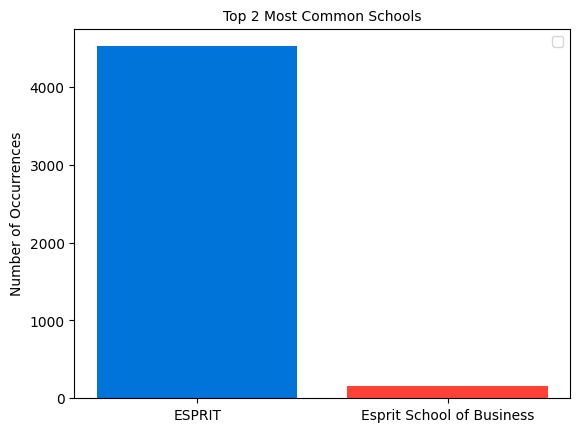

In [ ]:
common = Counter(data_raw['education']).most_common(2)
labels = [item[0] for item in common]
number = [item[1] for item in common]

colors = ['#0074D9', '#FF4136']

fig, ax = plt.subplots()
ax.bar(labels, number, color=colors)

ax.set_ylabel('Number of Occurrences')
ax.set_title('Top 2 Most Common Schools', fontsize=10)
ax.legend()

plt.show()

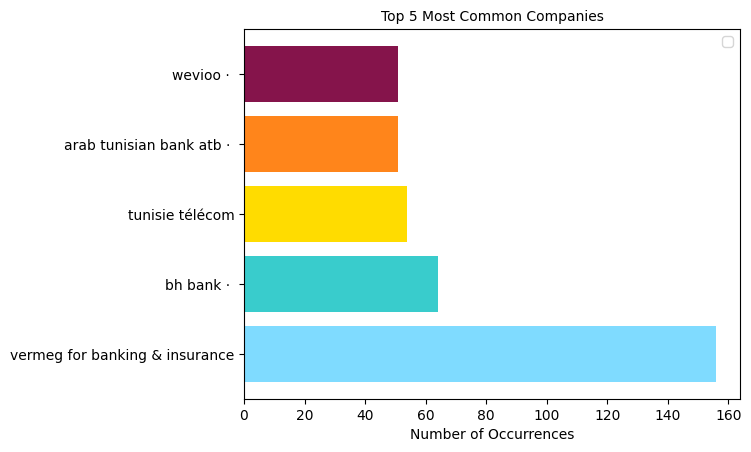

In [ ]:
common = Counter(data_raw['company']).most_common(5)
labels = [item[0] for item in common]
number = [item[1] for item in common]

colors = ['#7FDBFF', '#39CCCC', '#FFDC00', '#FF851B', '#85144B']

fig, ax = plt.subplots()
ax.barh(range(len(common)), number, tick_label=labels, color=colors)

ax.set_xlabel('Number of Occurrences')
ax.set_title('Top 5 Most Common Companies', fontsize=10)
ax.legend()

plt.show()

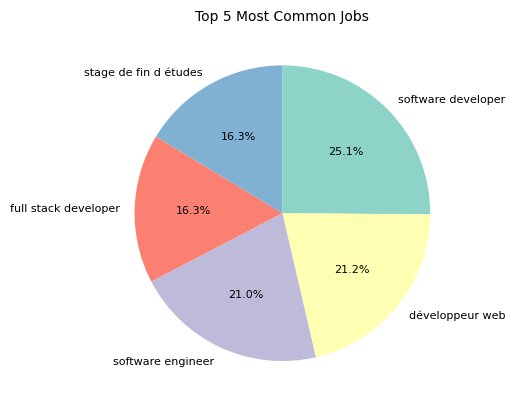

In [ ]:
common = Counter(data_raw['job']).most_common(7)[2:]
labels = [item[0] for item in common]
number = [item[1] for item in common]

colors = plt.cm.Set3(range(len(common)))

plt.pie(number, labels=labels, colors=colors, startangle=90, counterclock=False, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Top 5 Most Common Jobs', fontsize=10)
plt.show()

In [ ]:
print(len(data_raw))

6730


In [ ]:
#Keep only the rows that contain 'ESPRIT' in column 'education'
# Get the indices of the rows to be dropped
indices_to_drop = data_raw[~data_raw['education'].str.contains('ESPRIT')].index

# Drop the rows using the `drop()` method
data_raw = data_raw.drop(index=indices_to_drop)

In [ ]:
print(len(data_raw))

4525


In [ ]:
data_raw = data_raw.drop(columns=['education'])
data_raw

,work_location,company,job
0,"Tunis, Tunisia",VERMEG for Banking & Insurance Software ·,software programmer
1,"Tunis, Tunisia",Consulting @ Logiciels & Systèmes · Stage,web developer internship
2,"Tunis, Tunisia",RBB Africa · Stage,web developer
3,"La Marsa, Tunisia",VERMEG for Banking & Insurance Software · Cont...,software developer
4,"Dar Chaabane, Nabeul, Tunisia",VERMEG for Banking & Insurance Software,software development engineer
...,...,...,...
8151,"Paris, Île-de-France, France",Airbus,business intelligence analyst
8152,"Paris, Île-de-France, France",Banque de l'habitat Tunisie,business intelligence developer
8167,"Tunis, Tunisia",Bank ABC ·,dsa
8169,"Ariana, Tunisia",ISET Gabes · Stage,stage de fin d études


**Data** **Translation**

---



In [ ]:
#pip install --upgrade googletrans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from googletrans import Translator
import time

In [ ]:
translator = Translator(service_urls=['translate.google.com'])
data_raw['translated_job'] = ""
# loop through the rows of the dataset and translate each text
for i, row in data_raw.iterrows():
    # get the text to be translated
    text = row['job']
    try:
        # detect the source language of the text
        detected = translator.detect(text)
        
        # translate the text to a different language
        translated = translator.translate(text, dest='en')
        time.sleep(1)
        
        # store the translated text in the new column
        data_raw.at[i, 'translated_job'] = translated.text
        
    except Exception as e:
        print(f"Error translating text at row {i}: {e}")
        data_raw.at[i, 'translated_job'] = data_raw.at[i, 'job'] 
data_raw

,work_location,company,job,translated_job
0,"Tunis, Tunisia",VERMEG for Banking & Insurance Software ·,software programmer,Software programmer
1,"Tunis, Tunisia",Consulting @ Logiciels & Systèmes · Stage,web developer internship,web developer internship
2,"Tunis, Tunisia",RBB Africa · Stage,web developer,web developer
3,"La Marsa, Tunisia",VERMEG for Banking & Insurance Software · Cont...,software developer,software developer
4,"Dar Chaabane, Nabeul, Tunisia",VERMEG for Banking & Insurance Software,software development engineer,software development engineer
...,...,...,...,...
8151,"Paris, Île-de-France, France",Airbus,business intelligence analyst,business intelligence analyst
8152,"Paris, Île-de-France, France",Banque de l'habitat Tunisie,business intelligence developer,business intelligence developer
8167,"Tunis, Tunisia",Bank ABC ·,dsa,dsa
8169,"Ariana, Tunisia",ISET Gabes · Stage,stage de fin d études,internship at the end of my school program


In [ ]:
print(data_raw['job'][260])
print(data_raw['translated_job'][260])
print(data_raw['job'][320])
print(data_raw['translated_job'][320])
print(data_raw['job'][758])
print(data_raw['translated_job'][758])

coach et développeur fullstack
Fullstack coach and developer
software developer
software developer
full stack developer
full stack developer


In [ ]:
data_raw['translated_job'].value_counts()

intern                        426
software developer             95
software engineer              86
summer internship              69
Web developer                  62
                             ... 
webmaster                       1
Developer Web Applications      1
advanced technician             1
Consulting Junior               1
dsa                             1
Name: translated_job, Length: 1864, dtype: int64

In [ ]:
data_raw['translated_job'] = data_raw['translated_job'].map(lambda x: x.lower())

In [ ]:
data_raw['translated_job'] = data_raw['translated_job'].str.lower()
data_raw = data_raw.rename(columns={'translated_job': 'job_title'})
data_raw

,work_location,company,job,job_title
0,"Tunis, Tunisia",VERMEG for Banking & Insurance Software ·,software programmer,software programmer
1,"Tunis, Tunisia",Consulting @ Logiciels & Systèmes · Stage,web developer internship,web developer internship
2,"Tunis, Tunisia",RBB Africa · Stage,web developer,web developer
3,"La Marsa, Tunisia",VERMEG for Banking & Insurance Software · Cont...,software developer,software developer
4,"Dar Chaabane, Nabeul, Tunisia",VERMEG for Banking & Insurance Software,software development engineer,software development engineer
...,...,...,...,...
8151,"Paris, Île-de-France, France",Airbus,business intelligence analyst,business intelligence analyst
8152,"Paris, Île-de-France, France",Banque de l'habitat Tunisie,business intelligence developer,business intelligence developer
8167,"Tunis, Tunisia",Bank ABC ·,dsa,dsa
8169,"Ariana, Tunisia",ISET Gabes · Stage,stage de fin d études,internship at the end of my school program


In [ ]:
data_raw.drop("job", axis=1, inplace=True)
data_raw

,work_location,company,job_title
0,"Tunis, Tunisia",VERMEG for Banking & Insurance Software ·,software programmer
1,"Tunis, Tunisia",Consulting @ Logiciels & Systèmes · Stage,web developer internship
2,"Tunis, Tunisia",RBB Africa · Stage,web developer
3,"La Marsa, Tunisia",VERMEG for Banking & Insurance Software · Cont...,software developer
4,"Dar Chaabane, Nabeul, Tunisia",VERMEG for Banking & Insurance Software,software development engineer
...,...,...,...
8151,"Paris, Île-de-France, France",Airbus,business intelligence analyst
8152,"Paris, Île-de-France, France",Banque de l'habitat Tunisie,business intelligence developer
8167,"Tunis, Tunisia",Bank ABC ·,dsa
8169,"Ariana, Tunisia",ISET Gabes · Stage,internship at the end of my school program


In [ ]:
# Save the updated data to a new CSV file
data_raw.to_csv('translated_scraping_data.csv', index=False)

In [ ]:
print(len(data_raw))

4525


**Mapping Jobs And Skills**

In [ ]:
data=pd.read_csv("translated_scraping_data.csv")
data

,work_location,company,job_title
0,"Tunis, Tunisia",VERMEG for Banking & Insurance Software ·,software programmer
1,"Tunis, Tunisia",Consulting @ Logiciels & Systèmes · Stage,web developer internship
2,"Tunis, Tunisia",RBB Africa · Stage,web developer
3,"La Marsa, Tunisia",VERMEG for Banking & Insurance Software · Cont...,software developer
4,"Dar Chaabane, Nabeul, Tunisia",VERMEG for Banking & Insurance Software,software development engineer
...,...,...,...
4520,"Paris, Île-de-France, France",Airbus,business intelligence analyst
4521,"Paris, Île-de-France, France",Banque de l'habitat Tunisie,business intelligence developer
4522,"Tunis, Tunisia",Bank ABC ·,dsa
4523,"Ariana, Tunisia",ISET Gabes · Stage,internship at the end of my school program


In [ ]:
jobs=pd.read_csv("job_skills.csv")
jobs

,job_title,skills
0,Cloud Engineer,"Amazon Web Services (AWS), Microsoft Azure, Go..."
1,Cybersecurity Analyst,"Cybersecurity Frameworks, Threat Intelligence,..."
2,AI Engineer,"machine learning, deep learning, NLP, computer..."
3,DevOps Engineer,"automation, CI/CD, cloud computing, Docker, Py..."
4,Data Scientist,"statistical analysis, machine learning, data v..."
...,...,...
60,Software Developer,"Java, Python, C++, Agile Methodology, Software..."
61,.net Engineer,".net, C#, Agile Methodology, Software Design P..."
62,.net Developer,".net, C#, Agile Methodology, Software Design P..."
63,Angular Developer,"Angular, Agile Methodology, Software Design Pa..."


In [ ]:
jobs['job_title'] = jobs['job_title'].map(lambda x: x.lower())
jobs['skills'] = jobs['skills'].map(lambda x: x.lower())
jobs

,job_title,skills
0,cloud engineer,"amazon web services (aws), microsoft azure, go..."
1,cybersecurity analyst,"cybersecurity frameworks, threat intelligence,..."
2,ai engineer,"machine learning, deep learning, nlp, computer..."
3,devops engineer,"automation, ci/cd, cloud computing, docker, py..."
4,data scientist,"statistical analysis, machine learning, data v..."
...,...,...
60,software developer,"java, python, c++, agile methodology, software..."
61,.net engineer,".net, c#, agile methodology, software design p..."
62,.net developer,".net, c#, agile methodology, software design p..."
63,angular developer,"angular, agile methodology, software design pa..."


In [ ]:
jobs['job_title'].value_counts()

cloud engineer                            1
enterprise architect                      1
technical support engineer                1
mobile app developer                      1
artificial intelligence (ai) developer    1
                                         ..
it operations manager                     1
it sales representative                   1
cloud security engineer                   1
machine learning engineer                 1
springboot developer                      1
Name: job_title, Length: 65, dtype: int64

In [ ]:
job_skills_dict = {}

# loop through the job titles in the 'jobs' dataset
for job_title in jobs['job_title']:
    # add the job title and corresponding skills to the dictionary
    job_skills_dict[job_title] = jobs.loc[jobs['job_title'] == job_title, 'skills'].iloc[0]

# loop through each row in 'data' and extract the job title
# then look up the corresponding skills in the 'job_skills_dict'
data['job_skills'] = data['job_title'].apply(lambda x: [job_skills_dict[job_title] for job_title in jobs['job_title'] if all(word in job_title.lower() for word in x.lower().split())])
data

,work_location,company,job_title,job_skills
0,"Tunis, Tunisia",VERMEG for Banking & Insurance Software ·,software programmer,"[java, python, c++, agile methodology, softwar..."
1,"Tunis, Tunisia",Consulting @ Logiciels & Systèmes · Stage,web developer internship,[]
2,"Tunis, Tunisia",RBB Africa · Stage,web developer,"[html, css, javascript, php, content managemen..."
3,"La Marsa, Tunisia",VERMEG for Banking & Insurance Software · Cont...,software developer,"[java, python, c++, agile methodology, softwar..."
4,"Dar Chaabane, Nabeul, Tunisia",VERMEG for Banking & Insurance Software,software development engineer,"[java, python, c++, agile methodology, softwar..."
...,...,...,...,...
4520,"Paris, Île-de-France, France",Airbus,business intelligence analyst,"[data warehousing, data mining, data visualiza..."
4521,"Paris, Île-de-France, France",Banque de l'habitat Tunisie,business intelligence developer,[]
4522,"Tunis, Tunisia",Bank ABC ·,dsa,[]
4523,"Ariana, Tunisia",ISET Gabes · Stage,internship at the end of my school program,[]


In [ ]:
data['job_skills'].isna().any()

False

In [ ]:
contains_empty_lists = data['job_skills'].apply(lambda x: x == []).sum()
contains_empty_lists

3732

In [ ]:
data['job_skills'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
# Save the updated data to a new CSV file
data.to_csv('final_data_transl.csv', index=False)

**Using NLP To Map Jobs And Skills**

In [ ]:
df=pd.read_csv("final_data_transl.csv")

In [ ]:
!python -m spacy download en_core_web_md

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-30 22:45:56.208556: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-30 22:45:57.714070: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-03-30 22:45:59.880075: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 15.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the packag

In [ ]:
import spacy

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
nlp = spacy.load('en_core_web_md')

In [ ]:
job_skills_dict = dict(zip(jobs['job_title'], jobs['skills']))

In [ ]:
def extract_skills(job_title):
    job_title_doc = nlp(job_title)
    similarities = [job_title_doc.similarity(nlp(title)) for title in job_skills_dict.keys()]
    best_match_index = np.argmax(similarities)
    if similarities[best_match_index] >= 0.6:
        return job_skills_dict[list(job_skills_dict.keys())[best_match_index]]
    else:
        return None

In [ ]:
df['job_skills'] = df.apply(lambda row: extract_skills(row['job_title']) if row['job_skills']=='[]' else row['job_skills'], axis=1)
df

<ipython-input-23-59254012af5e>:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarities = [job_title_doc.similarity(nlp(title)) for title in job_skills_dict.keys()]


,work_location,company,job_title,job_skills
0,"Tunis, Tunisia",VERMEG for Banking & Insurance Software ·,software programmer,"['java, python, c++, agile methodology, softwa..."
1,"Tunis, Tunisia",Consulting @ Logiciels & Systèmes · Stage,web developer internship,"html, css, javascript, php, content management..."
2,"Tunis, Tunisia",RBB Africa · Stage,web developer,"['html, css, javascript, php, content manageme..."
3,"La Marsa, Tunisia",VERMEG for Banking & Insurance Software · Cont...,software developer,"['java, python, c++, agile methodology, softwa..."
4,"Dar Chaabane, Nabeul, Tunisia",VERMEG for Banking & Insurance Software,software development engineer,"['java, python, c++, agile methodology, softwa..."
...,...,...,...,...
4520,"Paris, Île-de-France, France",Airbus,business intelligence analyst,"['data warehousing, data mining, data visualiz..."
4521,"Paris, Île-de-France, France",Banque de l'habitat Tunisie,business intelligence developer,"tableau, power bi, data warehousing, etl, busi..."
4522,"Tunis, Tunisia",Bank ABC ·,dsa,None
4523,"Ariana, Tunisia",ISET Gabes · Stage,internship at the end of my school program,None


In [ ]:
df.dropna(subset=['job_skills'], inplace=True)
df

,work_location,company,job_title,job_skills
0,"Tunis, Tunisia",VERMEG for Banking & Insurance Software ·,software programmer,"['java, python, c++, agile methodology, softwa..."
1,"Tunis, Tunisia",Consulting @ Logiciels & Systèmes · Stage,web developer internship,"html, css, javascript, php, content management..."
2,"Tunis, Tunisia",RBB Africa · Stage,web developer,"['html, css, javascript, php, content manageme..."
3,"La Marsa, Tunisia",VERMEG for Banking & Insurance Software · Cont...,software developer,"['java, python, c++, agile methodology, softwa..."
4,"Dar Chaabane, Nabeul, Tunisia",VERMEG for Banking & Insurance Software,software development engineer,"['java, python, c++, agile methodology, softwa..."
...,...,...,...,...
4518,"Hammamet, Nabeul, Tunisia",BH Bank · Stage,software development intern,"java, python, c++, agile methodology, software..."
4519,"Paris, Île-de-France, France",Yellowsys ·,business intelligence consultant,"tableau, power bi, data warehousing, etl, busi..."
4520,"Paris, Île-de-France, France",Airbus,business intelligence analyst,"['data warehousing, data mining, data visualiz..."
4521,"Paris, Île-de-France, France",Banque de l'habitat Tunisie,business intelligence developer,"tableau, power bi, data warehousing, etl, busi..."


In [ ]:
print(len(df))

3676


In [ ]:
for ind in df.index:
    df['job_skills'][ind] = re.sub('["\'\[\]\(\)]', '', df['job_skills'][ind])
df

,work_location,company,job_title,job_skills
0,"Tunis, Tunisia",VERMEG for Banking & Insurance Software ·,software programmer,"java, python, c++, agile methodology, software..."
1,"Tunis, Tunisia",Consulting @ Logiciels & Systèmes · Stage,web developer internship,"html, css, javascript, php, content management..."
2,"Tunis, Tunisia",RBB Africa · Stage,web developer,"html, css, javascript, php, content management..."
3,"La Marsa, Tunisia",VERMEG for Banking & Insurance Software · Cont...,software developer,"java, python, c++, agile methodology, software..."
4,"Dar Chaabane, Nabeul, Tunisia",VERMEG for Banking & Insurance Software,software development engineer,"java, python, c++, agile methodology, software..."
...,...,...,...,...
4518,"Hammamet, Nabeul, Tunisia",BH Bank · Stage,software development intern,"java, python, c++, agile methodology, software..."
4519,"Paris, Île-de-France, France",Yellowsys ·,business intelligence consultant,"tableau, power bi, data warehousing, etl, busi..."
4520,"Paris, Île-de-France, France",Airbus,business intelligence analyst,"data warehousing, data mining, data visualizat..."
4521,"Paris, Île-de-France, France",Banque de l'habitat Tunisie,business intelligence developer,"tableau, power bi, data warehousing, etl, busi..."


In [ ]:
# Save the updated data to a new CSV file
df.to_csv('mapped_final_data.csv', index=False)

#**Data Modeling**


## Data Loading


In [5]:
df_jobs=pd.read_csv("mapped_final_data.csv")
df_jobs

,work_location,company,job_title,job_skills
0,"Tunis, Tunisia",VERMEG for Banking & Insurance Software ·,software programmer,"java, c++, agile methodology, software design ..."
1,"Tunis, Tunisia",Consulting @ Logiciels & Systèmes · Stage,web developer internship,"html, css, javascript, php, responsive design,..."
2,"Tunis, Tunisia",RBB Africa · Stage,web developer,"html, css, javascript, php, responsive design,..."
3,"La Marsa, Tunisia",VERMEG for Banking & Insurance Software · Cont...,software developer,"agile methodology, software design patterns, ...."
4,"Dar Chaabane, Nabeul, Tunisia",VERMEG for Banking & Insurance Software,software development engineer,"css, html, .net, c#, agile methodology, softwa..."
...,...,...,...,...
3655,"Hammamet, Nabeul, Tunisia",BH Bank · Stage,software development intern,"java, python, c++, agile methodology, software..."
3656,"Paris, Île-de-France, France",Yellowsys ·,business intelligence consultant,"tableau, power bi, data warehousing, etl, busi..."
3657,"Paris, Île-de-France, France",Airbus,business intelligence analyst,"data warehousing, data mining, data visualizat..."
3658,"Paris, Île-de-France, France",Banque de l'habitat Tunisie,business intelligence developer,"tableau, power bi, data warehousing, etl, busi..."


In [6]:
df_jobs = df_jobs.rename(columns={'job_skills': 'skills'})
df_jobs

,work_location,company,job_title,skills
0,"Tunis, Tunisia",VERMEG for Banking & Insurance Software ·,software programmer,"java, c++, agile methodology, software design ..."
1,"Tunis, Tunisia",Consulting @ Logiciels & Systèmes · Stage,web developer internship,"html, css, javascript, php, responsive design,..."
2,"Tunis, Tunisia",RBB Africa · Stage,web developer,"html, css, javascript, php, responsive design,..."
3,"La Marsa, Tunisia",VERMEG for Banking & Insurance Software · Cont...,software developer,"agile methodology, software design patterns, ...."
4,"Dar Chaabane, Nabeul, Tunisia",VERMEG for Banking & Insurance Software,software development engineer,"css, html, .net, c#, agile methodology, softwa..."
...,...,...,...,...
3655,"Hammamet, Nabeul, Tunisia",BH Bank · Stage,software development intern,"java, python, c++, agile methodology, software..."
3656,"Paris, Île-de-France, France",Yellowsys ·,business intelligence consultant,"tableau, power bi, data warehousing, etl, busi..."
3657,"Paris, Île-de-France, France",Airbus,business intelligence analyst,"data warehousing, data mining, data visualizat..."
3658,"Paris, Île-de-France, France",Banque de l'habitat Tunisie,business intelligence developer,"tableau, power bi, data warehousing, etl, busi..."


In [8]:
# filter out rows where job_title is "intern" or "internship"
df_jobs = df_jobs[~df_jobs['job_title'].isin(['intern', 'internship'])]
df_jobs

,work_location,company,job_title,skills,id
0,"Tunis, Tunisia",VERMEG for Banking & Insurance Software ·,software programmer,"java, c++, agile methodology, software design ...",0
1,"Tunis, Tunisia",Consulting @ Logiciels & Systèmes · Stage,web developer internship,"html, css, javascript, php, responsive design,...",1
2,"Tunis, Tunisia",RBB Africa · Stage,web developer,"html, css, javascript, php, responsive design,...",2
3,"La Marsa, Tunisia",VERMEG for Banking & Insurance Software · Cont...,software developer,"agile methodology, software design patterns, ....",3
4,"Dar Chaabane, Nabeul, Tunisia",VERMEG for Banking & Insurance Software,software development engineer,"css, html, .net, c#, agile methodology, softwa...",4
...,...,...,...,...,...
3655,"Hammamet, Nabeul, Tunisia",BH Bank · Stage,software development intern,"java, python, c++, agile methodology, software...",3655
3656,"Paris, Île-de-France, France",Yellowsys ·,business intelligence consultant,"tableau, power bi, data warehousing, etl, busi...",3656
3657,"Paris, Île-de-France, France",Airbus,business intelligence analyst,"data warehousing, data mining, data visualizat...",3657
3658,"Paris, Île-de-France, France",Banque de l'habitat Tunisie,business intelligence developer,"tableau, power bi, data warehousing, etl, busi...",3658


In [9]:
#df_jobs = df_jobs.reset_index()
df_jobs['id'] = df_jobs.index
df_jobs

<ipython-input-9-65f951e42ff4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs['id'] = df_jobs.index


,work_location,company,job_title,skills,id
0,"Tunis, Tunisia",VERMEG for Banking & Insurance Software ·,software programmer,"java, c++, agile methodology, software design ...",0
1,"Tunis, Tunisia",Consulting @ Logiciels & Systèmes · Stage,web developer internship,"html, css, javascript, php, responsive design,...",1
2,"Tunis, Tunisia",RBB Africa · Stage,web developer,"html, css, javascript, php, responsive design,...",2
3,"La Marsa, Tunisia",VERMEG for Banking & Insurance Software · Cont...,software developer,"agile methodology, software design patterns, ....",3
4,"Dar Chaabane, Nabeul, Tunisia",VERMEG for Banking & Insurance Software,software development engineer,"css, html, .net, c#, agile methodology, softwa...",4
...,...,...,...,...,...
3655,"Hammamet, Nabeul, Tunisia",BH Bank · Stage,software development intern,"java, python, c++, agile methodology, software...",3655
3656,"Paris, Île-de-France, France",Yellowsys ·,business intelligence consultant,"tableau, power bi, data warehousing, etl, busi...",3656
3657,"Paris, Île-de-France, France",Airbus,business intelligence analyst,"data warehousing, data mining, data visualizat...",3657
3658,"Paris, Île-de-France, France",Banque de l'habitat Tunisie,business intelligence developer,"tableau, power bi, data warehousing, etl, busi...",3658


In [10]:
df_jobs['job_title'] = df_jobs['job_title'].str.replace(' · Stage', '')
df_jobs['job_title'] = df_jobs['job_title'].str.replace(' · Internship', '')

<ipython-input-10-ee9c7184f5fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs['job_title'] = df_jobs['job_title'].str.replace(' · Stage', '')
<ipython-input-10-ee9c7184f5fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs['job_title'] = df_jobs['job_title'].str.replace(' · Internship', '')


In [11]:
df_program=pd.read_csv("programs.csv")
df_program

,option,skills,jobs
0,AI,"computer vision,nlp,sql,python,datamining,Hado...","AI Engineer,Artificial Intelligence Engineer, ..."
1,TWIN,"api,rest,angular,symfony,.net,c#,springboot,Un...","Software Developer, Software Engineer, Full St..."
2,SE,Devops,"DevOps Engineer, Cloud Engineer"
3,SIM,"swift,android development,ios development,mobi...","Mobile Developer,Android Developer,Mobile Deve..."
4,SAE,"front-end,back-end,api,rest api,angular,dotnet...","Software Engineer,Software Developer,Software ..."
5,INFINI,"finance,machine learning,data mining","Data Scientist, Data Science Engineer"
6,DS,"nlp,data science,data mining,data visualizatio...","Data Scientist,Data Engineer,Machine Learning ..."
7,BI,"data warehousing,data mining,data visualizatio...","Big Data Engineer,Data Analyst,Business Intell..."
8,ARCTIC,"aws,azure,cloud computing,Cybersecurity Framew...","Cloud Solutions Architect,Cloud Engineer,Cloud..."


In [12]:
df_program['skills'] = df_program['skills'].str.lower()
df_program['jobs'] = df_program['jobs'].str.lower()
df_program

,option,skills,jobs
0,AI,"computer vision,nlp,sql,python,datamining,hado...","ai engineer,artificial intelligence engineer, ..."
1,TWIN,"api,rest,angular,symfony,.net,c#,springboot,un...","software developer, software engineer, full st..."
2,SE,devops,"devops engineer, cloud engineer"
3,SIM,"swift,android development,ios development,mobi...","mobile developer,android developer,mobile deve..."
4,SAE,"front-end,back-end,api,rest api,angular,dotnet...","software engineer,software developer,software ..."
5,INFINI,"finance,machine learning,data mining","data scientist, data science engineer"
6,DS,"nlp,data science,data mining,data visualizatio...","data scientist,data engineer,machine learning ..."
7,BI,"data warehousing,data mining,data visualizatio...","big data engineer,data analyst,business intell..."
8,ARCTIC,"aws,azure,cloud computing,cybersecurity framew...","cloud solutions architect,cloud engineer,cloud..."


  ## K-nearest neighbors (KNN)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
df_jobs_train = df_jobs

In [15]:
# Preprocess text data
tfidf = TfidfVectorizer()
jobs_tfidf = tfidf.fit_transform(df_jobs_train['skills'])
programs_tfidf = tfidf.transform(df_program['skills'])

In [18]:
# Dimensionality reduction
svd = TruncatedSVD(n_components=259)
jobs_svd = svd.fit_transform(jobs_tfidf)
programs_svd = svd.transform(programs_tfidf)

In [19]:
# Build kNN model
knn = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='cosine')
knn.fit(jobs_svd)

NearestNeighbors(algorithm='brute', metric='cosine')

In [21]:
# Recommend jobs for each program
distances, indices = knn.kneighbors(programs_svd)

recommended_jobs = []
recommended_jobs_id = []

for i in range(len(indices)):
    # Get the job titles and ids of the jobs
    similar_jobs = df_jobs_train.iloc[indices[i]]
    job_ids = similar_jobs['id'].values
    similar_jobs = similar_jobs['job_title'].values
    # Calculate the similarity rate for each job
    rates = [len(set(df_program.iloc[i]['skills'].split(',')) & set(job_skills.split(','))) / len(set(df_program.iloc[i]['skills'].split(',')) | set(job_skills.split(','))) for job_skills in df_jobs_train.iloc[indices[i]]['skills']]
    # Filter jobs with similarity rate less than 0.2 and sort them by similarity rate
    similar_jobs = [similar_jobs[j] for j in range(len(similar_jobs)) if rates[j] < 0.2]
    job_ids = [job_ids[j] for j in range(len(job_ids)) if rates[j] < 0.2]
    sorted_jobs, sorted_jobs_id = zip(*sorted(zip(similar_jobs, job_ids), key=lambda x: x[0], reverse=True))
    # Append the recommended jobs and ids to the respective lists
    recommended_jobs.append(', '.join(sorted_jobs[:5]))
    recommended_jobs_id.append(', '.join(map(str, sorted_jobs_id[:5])))
    
# Add recommended jobs and ids to df_program
df_program['recommended_jobs'] = recommended_jobs
df_program['recommended_jobs_id'] = recommended_jobs_id

# Display the resulting dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

print(df_program)

   option                                             skills                                               jobs                                   recommended_jobs           recommended_jobs_id
0      AI  computer vision,nlp,sql,python,datamining,hado...  ai engineer,artificial intelligence engineer, ...  tray bi ai, artificial intelligence engineer, ...    401, 3341, 2434, 707, 2546
1    TWIN  api,rest,angular,symfony,.net,c#,springboot,un...  software developer, software engineer, full st...  springboot intern, software developer symfony,...         6, 140, 143, 116, 110
2      SE                                             devops                    devops engineer, cloud engineer  lead cloud architect, cloud internship, cloud ...   2507, 277, 1628, 2758, 2508
3     SIM  swift,android development,ios development,mobi...  mobile developer,android developer,mobile deve...  mobile developer, mobile developer, mobile app...   1058, 2334, 220, 2638, 2707
4     SAE  front-end,back-end,api,r

In [74]:

print(df_program)

   option                                             skills                                               jobs                                   recommended_jobs           recommended_jobs_id                                 recommended_skills
0      AI  computer vision,nlp,sql,python,datamining,hado...  ai engineer,artificial intelligence engineer, ...  tray bi ai, artificial intelligence engineer, ...    401, 3341, 2434, 707, 2546                         react, typescript, css, c#
1    TWIN  api,rest,angular,symfony,.net,c#,springboot,un...  software developer, software engineer, full st...  springboot intern, software developer symfony,...         6, 140, 143, 116, 110  php, agile methodology, customer service, resp...
2      SE                                             devops                    devops engineer, cloud engineer  lead cloud architect, cloud internship, cloud ...   2507, 277, 1628, 2758, 2508  typescript, php, software design patterns, rea...
3     SIM  swift,android

In [46]:
##" bouha"
def recommend_jobs(option, program_skills):
    # Find the index of the program in the programs dataframe
    program_idx = df_program[df_program['option'] == option].index[0]
    
    # Compute the SVD representation of the program
    program_svd = svd.transform(tfidf.transform([program_skills]))[0]
    
    # Find the indices of the most similar programs
    distances, indices = knn.kneighbors([program_svd])
    
    # Get the job titles and ids of the most similar jobs
    similar_jobs = df_jobs_train.iloc[indices[0]]
    job_ids = similar_jobs['id'].values
    similar_jobs = similar_jobs['job_title'].values
    
    # Calculate the similarity rate for each job
    rates = [len(set(program_skills.split(',')) & set(job_skills.split(','))) / len(set(program_skills.split(',')) | set(job_skills.split(','))) for job_skills in df_jobs_train.iloc[indices[0]]['skills']]
    
    # Filter jobs with similarity rate less than 0.2 and sort them by similarity rate
    similar_jobs = [similar_jobs[j] for j in range(len(similar_jobs)) if rates[j] < 0.2]
    job_ids = [job_ids[j] for j in range(len(job_ids)) if rates[j] < 0.2 ]
    sorted_jobs, sorted_jobs_id = zip(*sorted(zip(similar_jobs, job_ids), key=lambda x: x[0], reverse=True))
    
    # Return the top 5 recommended jobs and their IDs
    return {'recommended_jobs': list(sorted_jobs[:5]), 'recommended_job_ids': list(sorted_jobs_id[:5])}


In [64]:
recommendations = recommend_jobs('TWIN', 'docker,kubernetes,bash')
print(recommendations)

{'recommended_jobs': ['devops engineer', 'devops engineer', 'devops engineer', 'devops engineer', 'devops engineer'], 'recommended_job_ids': [231, 3357, 3359, 3150, 3358]}


  ## Latent Dirichlet Allocation (LDA) 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import manhattan_distances

# Fit TF-IDF vectorizer
tfidf = TfidfVectorizer()
job_skills_tfidf = tfidf.fit_transform(df_jobs['skills'].fillna(''))

# Fit LDA model
lda = LatentDirichletAllocation(n_components=80, max_iter=200)
job_skills_lda = lda.fit_transform(job_skills_tfidf)

# Transform program skills
program_skills_tfidf = tfidf.transform(df_program['skills'].fillna(''))
program_skills_lda = lda.transform(program_skills_tfidf)

# Compute cosine similarity between program and job topic distributions
similarity = 1 / (1 + manhattan_distances(program_skills_lda, job_skills_lda))

# Find top 5 job titles and job ids for each program
top_jobs_indices = similarity.argsort()[:, :-6:-1]
recommended_jobs = []
for i in range(len(top_jobs_indices)):
    recommended_jobs.append(', '.join([df_jobs.iloc[idx]['job_title'] for idx in top_jobs_indices[i]]))

# Add recommended jobs to dataframe
df_program['recommended_jobs2'] = recommended_jobs
df_program

,option,skills,jobs,recommended_jobs2
0,AI,"computer vision,nlp,sql,python,datamining,hado...","ai engineer,artificial intelligence engineer, ...","tray bi ai, ai research scientist intern, arti..."
1,TWIN,"api,rest,angular,symfony,.net,c#,springboot,un...","software developer, software engineer, full st...","software developer symfony, software developer..."
2,SE,devops,"devops engineer, cloud engineer","cloud computing engineer, speaker google cloud..."
3,SIM,"swift,android development,ios development,mobi...","mobile developer,android developer,mobile deve...","frontend mobile developer, mobile developer, b..."
4,SAE,"front-end,back-end,api,rest api,angular,dotnet...","software engineer,software developer,software ...","software developer, software developer symfony..."
5,INFINI,"finance,machine learning,data mining","data scientist, data science engineer","data science intern, data scientist, data scie..."
6,DS,"nlp,data science,data mining,data visualizatio...","data scientist,data engineer,machine learning ...","data scientist insights data, data scientist, ..."
7,BI,"data warehousing,data mining,data visualizatio...","big data engineer,data analyst,business intell...","talend consultant, business analyst developer,..."
8,ARCTIC,"aws,azure,cloud computing,cybersecurity framew...","cloud solutions architect,cloud engineer,cloud...",consultant microsoft dynamics 365 ce power pla...


  ## Non-negative Matrix Factorization (NMF)

In [ ]:
#TF-IDF Vectorizer + Non-negative Matrix Factorization (NMF) + Pearson Correlation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import pearsonr
import numpy as np

# Fit TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')
job_skills_tfidf = tfidf.fit_transform(df_jobs['skills'].fillna(''))

# Fit NMF model
#can modify the n_components (less)
nmf = NMF(n_components=48)
job_skills_nmf = nmf.fit_transform(job_skills_tfidf)

# Transform program skills
program_skills_tfidf = tfidf.transform(df_program['skills'].fillna(''))
program_skills_nmf = nmf.transform(program_skills_tfidf)

# Compute Pearson correlation coefficient between program skills and job skills
similarity = [[pearsonr(set1, set2)[0] for set2 in job_skills_nmf] for set1 in program_skills_nmf]

# Convert the similarity list to a NumPy array
similarity = np.array(similarity)

# Find top 5 job titles and job ids for each program
top_jobs_indices = similarity.argsort()[:, :-6:-1]
recommended_jobs = []
recommended_jobs_id = []
for i in range(len(program_skills_nmf)):
    job_indices = top_jobs_indices[i]
    top_jobs = [df_jobs.iloc[idx]['job_title'] for idx in job_indices]
    top_jobs_id = [str(df_jobs.iloc[idx]['id']) for idx in job_indices] # convert job ids to strings
    recommended_jobs.append(', '.join(top_jobs))
    recommended_jobs_id.append(', '.join(top_jobs_id))

# Add recommended jobs and job ids to dataframe
df_program['recommended_jobs3'] = recommended_jobs
df_program['recommended_jobs_id3'] = recommended_jobs_id

# Display the resulting dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
print(df_program)

   option                                             skills                                               jobs                                  recommended_jobs3          recommended_jobs_id3
0      AI  computer vision,nlp,sql,python,datamining,hado...  ai engineer,artificial intelligence engineer, ...  big data developer, big data developer mastery...     2705, 918, 2596, 40, 2598
1    TWIN  api,rest,angular,symfony,.net,c#,springboot,un...  software developer, software engineer, full st...  software developer symfony, software developer...       140, 143, 110, 216, 235
2      SE                                             devops                    devops engineer, cloud engineer  cloud developer net core, oracle erp cloud tec...   3183, 970, 2981, 1425, 2498
3     SIM  swift,android development,ios development,mobi...  mobile developer,android developer,mobile deve...  android developer, bi developer, mobile develo...    129, 3277, 2582, 2638, 220
4     SAE  front-end,back-end,api,r

  ## Recommended Skills (Levenshtein distance)

In [47]:
!pip install textdistance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import textdistance
# Loop through each row of the dataframe
for index, row in df_program.iterrows():
    # Get program skills
    program_skills = row['skills'].split(',')
    
    # Create list to store missing skills
    missing_skills_list_name = f"missing_skills_{index}"
    globals()[missing_skills_list_name] = []
    
    # Loop through each job
    for job_num in range(1, 6):
        # Get job skills
        job_skills = df_jobs['skills'][job_num].split(',')
        
        # Loop through each job skill
        for skill in job_skills:
            similar = False
            for prog_skill in program_skills:
                similarity = textdistance.levenshtein.normalized_similarity(skill.strip(), prog_skill.strip())
                if similarity >= 0.2:
                    similar = True
                    break
            
            if not similar:
                globals()[missing_skills_list_name].append(skill.strip())
    
    # Remove duplicates from missing skills
    missing_skills = list(set(globals()[missing_skills_list_name]))
    
    # Append missing skills to recommended skills list
    recommended_skills_list_name = f"recommended_skills_{index}"
    globals()[recommended_skills_list_name] = ', '.join(missing_skills)
    
    # Assign recommended skills list to "recommended_skills" column of dataframe
    df_program.at[index, 'recommended_skills'] = ', '.join(list(set(globals()[missing_skills_list_name]))) 

In [65]:
##bouha2
import pandas as pd
import textdistance

def get_recommended_skills(option):
    # Read the program and job data from csv files
    
    # Get the row corresponding to the program name
    program_row = df_program.loc[df_program['option'] == option].iloc[0]
    
    # Get program skills
    program_skills = program_row['skills'].split(',')
    
    # Create list to store missing skills
    missing_skills_list = []
    
    # Loop through each job
    for job_num in range(1, 6):
        # Get job skills
        job_skills = df_jobs['skills'][job_num].split(',')
        
        # Loop through each job skill
        for skill in job_skills:
            similar = False
            for prog_skill in program_skills:
                similarity = textdistance.levenshtein.normalized_similarity(skill.strip(), prog_skill.strip())
                if similarity >= 0.2:
                    similar = True
                    break
            
            if not similar:
                missing_skills_list.append(skill.strip())
    
    # Remove duplicates from missing skills
    recommended_skills = list(set(missing_skills_list))
    
    # Return recommended skills
    return recommended_skills


In [73]:
print(df_program)

   option                                             skills                                               jobs                                   recommended_jobs           recommended_jobs_id                                 recommended_skills
0      AI  computer vision,nlp,sql,python,datamining,hado...  ai engineer,artificial intelligence engineer, ...  tray bi ai, artificial intelligence engineer, ...    401, 3341, 2434, 707, 2546                         react, typescript, css, c#
1    TWIN  api,rest,angular,symfony,.net,c#,springboot,un...  software developer, software engineer, full st...  springboot intern, software developer symfony,...         6, 140, 143, 116, 110  php, agile methodology, customer service, resp...
2      SE                                             devops                    devops engineer, cloud engineer  lead cloud architect, cloud internship, cloud ...   2507, 277, 1628, 2758, 2508  typescript, php, software design patterns, rea...
3     SIM  swift,android

In [66]:
recommended_skills = get_recommended_skills('TWIN')
print(recommended_skills)

['php', 'agile methodology', 'customer service', 'responsive design', 'networking']


In [68]:
import pickle

In [72]:

dependencies = {
    
    'df_program': df_program,
    'df_jobs': df_jobs,
    'get_recommended_skills': get_recommended_skills,
}

with open('dependencies.pkl', 'wb') as f:
    pickle.dump(dependencies, f)

In [71]:
for key, value in dependencies.items():
    print(f"{key}: {type(value)}")


textdistance: <class 'module'>
df_program: <class 'pandas.core.frame.DataFrame'>
df_jobs: <class 'pandas.core.frame.DataFrame'>
get_recommended_skills: <class 'function'>


In [51]:
df_program

,option,skills,jobs,recommended_jobs,recommended_jobs_id,recommended_skills
0,AI,"computer vision,nlp,sql,python,datamining,hado...","ai engineer,artificial intelligence engineer, ...","tray bi ai, artificial intelligence engineer, ...","401, 3341, 2434, 707, 2546","react, typescript, css, c#"
1,TWIN,"api,rest,angular,symfony,.net,c#,springboot,un...","software developer, software engineer, full st...","springboot intern, software developer symfony,...","6, 140, 143, 116, 110","php, agile methodology, customer service, resp..."
2,SE,devops,"devops engineer, cloud engineer","lead cloud architect, cloud internship, cloud ...","2507, 277, 1628, 2758, 2508","typescript, php, software design patterns, rea..."
3,SIM,"swift,android development,ios development,mobi...","mobile developer,android developer,mobile deve...","mobile developer, mobile developer, mobile app...","1058, 2334, 220, 2638, 2707","php, c#"
4,SAE,"front-end,back-end,api,rest api,angular,dotnet...","software engineer,software developer,software ...","springboot intern, software programmer, softwa...","6, 159, 123, 145, 151","php, networking"
5,INFINI,"finance,machine learning,data mining","data scientist, data science engineer","stagiaire business intelligence data science, ...","3213, 3236, 1688, 1678, 1737","typescript, php, .net, css, c#, html, node.js,..."
6,DS,"nlp,data science,data mining,data visualizatio...","data scientist,data engineer,machine learning ...","data scientist and web developer, data science...","483, 1390, 676, 1205, 1389","react, node.js, css, c#"
7,BI,"data warehousing,data mining,data visualizatio...","big data engineer,data analyst,business intell...","business intelligence analyst, business intell...","2215, 3538, 368, 1837, 1412","react, c#, node.js, remote support, css"
8,ARCTIC,"aws,azure,cloud computing,cybersecurity framew...","cloud solutions architect,cloud engineer,cloud...","lead cloud architect, cloud internship, cloud ...","2507, 277, 1628, 2758, 2508","php, software design patterns, react, c#, html..."


  ## Matching Rate (Cosine Similarity)

In [ ]:
#Matching Rate
# Calculate similarity between programs and jobs
similarity_matrix = cosine_similarity(programs_svd, jobs_svd)
df_program['rate'] = (similarity_matrix.max(axis=1) * 100).astype(int)

In [ ]:
# Save the updated data to a new CSV file
df_program.to_csv('final_programs.csv', index=False)
df_jobs.to_csv('final_jobs.csv', index=False)

In [ ]:
df_program

,option,skills,jobs,recommended_jobs,recommended_jobs_id,recommended_jobs2,recommended_jobs3,recommended_jobs_id3,rate,recommended_skills
0,AI,"computer vision,nlp,sql,python,datamining,hado...","ai developer,ai engineer,artificial intelligen...","tray bi ai, ai research scientist intern, ai e...","401, 2681, 2546, 707, 1520","full stack developer, data engineer analyst, f...","ai engineer intern, ai 900 microsoft azure ai ...","707, 1520, 2434, 2681, 401",52,"c#, react, typescript, css"
1,TWIN,"api,rest,angular,symfony,.net,c#,springboot,un...","full stack developer,back-end developer,front-...","springboot intern, software developer symfony,...","6, 140, 143, 116, 110","business analyst, communications manager, java...","software developer, software developer symfony...","143, 140, 110, 179, 222",65,"customer service, responsive design, agile met..."
2,SE,devops,devops engineer,"lead cloud architect, cloud internship, cloud ...","2507, 277, 1628, 2508, 2758","internship for an end of studies project, soft...","azure fundamentals, it architecture and cloud ...","2498, 2981, 3183, 1425, 970",18,"c#, react, customer service, responsive design..."
3,SIM,"swift,android development,ios development,mobi...","mobile developer,android developer,mobile deve...","mobile developer, mobile developer, mobile app...","1058, 2334, 220, 2638, 2707","production manager, android developer and trai...","android developer, mobile developer, mobile de...","129, 329, 54, 3277, 220",55,"c#, php"
4,SAE,"front-end,back-end,api,rest api,angular,dotnet...","software engineer,software developer,software ...","springboot intern, software programmer, softwa...","6, 159, 123, 145, 151","production manager, devops engineer and consul...","software programmer, net software developer, s...","159, 151, 145, 123, 27",59,"php, networking"
5,INFINI,"finance,machine learning,data mining",quality assurance engineer,"data understanding and preparation, data scien...","3127, 609, 3245, 2572, 433","java jee develops, full stack engineer, devops...","data scientist and web developer, data scienti...","483, 1739, 2798, 1761, 439",78,"c#, remote support, responsive design, html, ...."
6,DS,"nlp,data science,data mining,data visualizatio...","data scientist,data engineer,machine learning ...","data science internship, data science intern, ...","1390, 1204, 3236, 2547, 676","data engineer, lean manufacturing trainee, jav...","ai research scientist intern, ai 900 microsoft...","2681, 1520, 401, 707, 2546",73,"node.js, react, c#, css"
7,BI,"data warehousing,data mining,data visualizatio...","big data engineer,data analyst,business intell...","business intelligence analyst, business intell...","368, 3543, 2215, 1837, 3538","business intelligence analyst, communications ...","talend consultant, data analyst intern, guidew...","282, 3382, 411, 419, 436",82,"c#, react, remote support, css, node.js"
8,ARCTIC,"aws,azure,cloud computing,cybersecurity framew...","cloud solutions architect,cloud engineer,cloud...","lead cloud architect, cloud internship, cloud ...","2507, 277, 1628, 2508, 2758","it support engineer, development research engi...","lead cloud architect, cloud architect intern, ...","2507, 1628, 277, 2758, 2508",61,"c#, react, agile methodology, node.js, html, s..."


#**Model Evaluation**


In [ ]:
# Create a subset of the df_jobs dataframe with a smaller number of unique job titles
df_jobs_subset = df_jobs.sample(n=50, random_state=42)

# Split the recommended_jobs column into individual items
df_program['recommended_jobs'] = df_program['recommended_jobs'].astype(str).apply(lambda x: x.split(','))

# Calculate catalog coverage using only unique recommended jobs within df_program and df_jobs_subset
recommended_items = np.unique(np.concatenate(df_program['recommended_jobs'].values))
catalog_size = len(df_jobs_subset['job_title'].unique())
catalog_coverage1 = len(recommended_items) / catalog_size 
print("Catalog Coverage:", catalog_coverage1)

# Calculate item coverage using only unique recommended jobs within df_program and df_jobs_subset
item_counts = df_program.explode('recommended_jobs')['recommended_jobs'].value_counts()
item_coverage1 = len(item_counts) / catalog_size 
print("Item Coverage:", item_coverage1)

# Calculate diversity using only df_program and df_jobs_subset
def entropy(x):
    value_counts = pd.Series(x).value_counts(normalize=True)
    return -(value_counts * np.log2(value_counts)).sum()

diversity1 = df_program.groupby('jobs')['recommended_jobs'].apply(entropy).mean()
print("Diversity:", diversity1)

Catalog Coverage: 0.6304347826086957
Item Coverage: 0.6304347826086957
Diversity: 0.0


In [ ]:
# Create a subset of the df_jobs dataframe with a smaller number of unique job titles
df_jobs_subset = df_jobs.sample(n=50, random_state=42)

# Split the recommended_jobs column into individual items
df_program['recommended_jobs2'] = df_program['recommended_jobs2'].astype(str).apply(lambda x: x.split(','))

# Calculate catalog coverage using only unique recommended jobs within df_program and df_jobs_subset
recommended_items = np.unique(np.concatenate(df_program['recommended_jobs2'].values))
catalog_size = len(df_jobs_subset['job_title'].unique())
catalog_coverage2 = len(recommended_items) / catalog_size 
print("Catalog Coverage:", catalog_coverage2)

# Calculate item coverage using only unique recommended jobs within df_program and df_jobs_subset
item_counts = df_program.explode('recommended_jobs2')['recommended_jobs2'].value_counts()
item_coverage2 = len(item_counts) / catalog_size 
print("Item Coverage:", item_coverage2)

# Calculate diversity using only df_program and df_jobs_subset
def entropy(x):
    value_counts = pd.Series(x).value_counts(normalize=True)
    return -(value_counts * np.log2(value_counts)).sum()

diversity2 = df_program.groupby('jobs')['recommended_jobs2'].apply(entropy).mean()
print("Diversity:", diversity2)

Catalog Coverage: 0.8260869565217391
Item Coverage: 0.8260869565217391
Diversity: 0.0


In [ ]:
# Create a subset of the df_jobs dataframe with a smaller number of unique job titles
df_jobs_subset = df_jobs.sample(n=50, random_state=42)

# Split the recommended_jobs column into individual items
df_program['recommended_jobs3'] = df_program['recommended_jobs3'].astype(str).apply(lambda x: x.split(','))

# Calculate catalog coverage using only unique recommended jobs within df_program and df_jobs_subset
recommended_items = np.unique(np.concatenate(df_program['recommended_jobs3'].values))
catalog_size = len(df_jobs_subset['job_title'].unique())
catalog_coverage3 = len(recommended_items) / catalog_size 
print("Catalog Coverage:", catalog_coverage3)

# Calculate item coverage using only unique recommended jobs within df_program and df_jobs_subset
item_counts = df_program.explode('recommended_jobs3')['recommended_jobs3'].value_counts()
item_coverage3 = len(item_counts) / catalog_size 
print("Item Coverage:", item_coverage3)

# Calculate diversity using only df_program and df_jobs_subset
def entropy(x):
    value_counts = pd.Series(x).value_counts(normalize=True)
    return -(value_counts * np.log2(value_counts)).sum()

diversity3 = df_program.groupby('jobs')['recommended_jobs3'].apply(entropy).mean()
print("Diversity:", diversity3)

Catalog Coverage: 0.6739130434782609
Item Coverage: 0.6739130434782609
Diversity: 0.0


In [ ]:
# Split the jobs column into individual items
df_program['jobs'] = df_program['jobs'].apply(lambda x: set(x.split(',')))

In [ ]:
# Split the recommende_jobs column into individual items
df_program['recommended_jobs'] = df_program['recommended_jobs'].apply(lambda x: set(x.split(',')))
df_program['recommended_jobs2'] = df_program['recommended_jobs2'].apply(lambda x: set(x.split(',')))
df_program['recommended_jobs3'] = df_program['recommended_jobs3'].apply(lambda x: set(x.split(',')))

In [ ]:
# Calculate the number of unique jobs in the catalog
catalog_jobs = set(df_jobs['job_title'].unique())
catalog_size = len(catalog_jobs)

# Calculate novelty for each program
novelty_scores = []
for _, row in df_program.iterrows():
    recommended_jobs = row['recommended_jobs']
    recommended_jobs_not_in_catalog = recommended_jobs.difference(catalog_jobs)
    novelty = len(recommended_jobs_not_in_catalog) / catalog_size
    novelty_scores.append(novelty)

# Calculate the average novelty score across all programs
avg_novelty1 = sum(novelty_scores) / len(novelty_scores)

In [ ]:
# Calculate the number of unique jobs in the catalog
catalog_jobs = set(df_jobs['job_title'].unique())
catalog_size = len(catalog_jobs)

# Calculate novelty for each program
novelty_scores = []
for _, row in df_program.iterrows():
    recommended_jobs = row['recommended_jobs2']
    recommended_jobs_not_in_catalog = recommended_jobs.difference(catalog_jobs)
    novelty = len(recommended_jobs_not_in_catalog) / catalog_size
    novelty_scores.append(novelty)

# Calculate the average novelty score across all programs
avg_novelty2 = sum(novelty_scores) / len(novelty_scores)

In [ ]:
# Calculate the number of unique jobs in the catalog
catalog_jobs = set(df_jobs['job_title'].unique())
catalog_size = len(catalog_jobs)

# Calculate novelty for each program
novelty_scores = []
for _, row in df_program.iterrows():
    recommended_jobs = row['recommended_jobs3']
    recommended_jobs_not_in_catalog = recommended_jobs.difference(catalog_jobs)
    novelty = len(recommended_jobs_not_in_catalog) / catalog_size
    novelty_scores.append(novelty)

# Calculate the average novelty score across all programs
avg_novelty3 = sum(novelty_scores) / len(novelty_scores)

In [ ]:
# Calculate the number of unique jobs in the catalog
catalog_size = len(df_jobs['job_title'].unique())

# Calculate the number of recommendations per program
df_program['num_recommendations'] = 5

# Calculate novelty, serendipity, and accuracy for each program
novelty_scores = []
serendipity_scores = []
accuracy_scores = []


for _, row in df_program.iterrows():
    recommended_jobs = set(row['recommended_jobs'])
    num_recommendations = 5
    relevant_jobs = row['jobs']
    num_relevant_jobs = len(relevant_jobs)
    
    
    # Calculate serendipity
    recommended_jobs_not_required = recommended_jobs.difference(relevant_jobs)
    if num_recommendations > 0:
        serendipity = len(recommended_jobs_not_required) / num_recommendations
    else:
        serendipity = 0
    serendipity_scores.append(serendipity)
    
    # Calculate accuracy
    if num_relevant_jobs > 0:
        accuracy = len(recommended_jobs.intersection(relevant_jobs)) / num_relevant_jobs
    else:
        accuracy = 0
    accuracy_scores.append(accuracy)

# Calculate the average scores across all programs
avg_serendipity1 = sum(serendipity_scores) / len(serendipity_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

In [ ]:
# Calculate the number of unique jobs in the catalog
catalog_size = len(df_jobs['job_title'].unique())

# Calculate the number of recommendations per program
df_program['num_recommendations'] = 5

# Calculate novelty, serendipity, and accuracy for each program
novelty_scores = []
serendipity_scores = []
accuracy_scores = []


for _, row in df_program.iterrows():
    recommended_jobs = set(row['recommended_jobs2'])
    num_recommendations = 5
    relevant_jobs = row['jobs']
    num_relevant_jobs = len(relevant_jobs)
    
    
    # Calculate serendipity
    recommended_jobs_not_required = recommended_jobs.difference(relevant_jobs)
    if num_recommendations > 0:
        serendipity = len(recommended_jobs_not_required) / num_recommendations
    else:
        serendipity = 0
    serendipity_scores.append(serendipity)
    
    # Calculate accuracy
    if num_relevant_jobs > 0:
        accuracy = len(recommended_jobs.intersection(relevant_jobs)) / num_relevant_jobs
    else:
        accuracy = 0
    accuracy_scores.append(accuracy)

# Calculate the average scores across all programs
avg_serendipity2 = sum(serendipity_scores) / len(serendipity_scores)
avg_accuracy2 = sum(accuracy_scores) / len(accuracy_scores)

In [ ]:
# Calculate the number of unique jobs in the catalog
catalog_size = len(df_jobs['job_title'].unique())

# Calculate the number of recommendations per program
df_program['num_recommendations'] = 5

# Calculate novelty, serendipity, and accuracy for each program
novelty_scores = []
serendipity_scores = []
accuracy_scores = []


for _, row in df_program.iterrows():
    recommended_jobs = set(row['recommended_jobs3'])
    num_recommendations = 5
    relevant_jobs = row['jobs']
    num_relevant_jobs = len(relevant_jobs)
    
    
    # Calculate serendipity
    recommended_jobs_not_required = recommended_jobs.difference(relevant_jobs)
    if num_recommendations > 0:
        serendipity = len(recommended_jobs_not_required) / num_recommendations
    else:
        serendipity = 0
    serendipity_scores.append(serendipity)
    
    # Calculate accuracy
    if num_relevant_jobs > 0:
        accuracy = len(recommended_jobs.intersection(relevant_jobs)) / num_relevant_jobs
    else:
        accuracy = 0
    accuracy_scores.append(accuracy)

# Calculate the average scores across all programs
avg_serendipity3 = sum(serendipity_scores) / len(serendipity_scores)
avg_accuracy3 = sum(accuracy_scores) / len(accuracy_scores)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# create a vectorizer to convert job titles to a document term matrix
vectorizer = TfidfVectorizer(stop_words='english')
jobs_dtm = vectorizer.fit_transform(df_jobs['job_title'])

def calculate_similarity(program_jobs, recommended_jobs, jobs_dtm):
    program_jobs_dtm = jobs_dtm[program_jobs]
    recommended_jobs_dtm = jobs_dtm[recommended_jobs]
    similarities = cosine_similarity(program_jobs_dtm, recommended_jobs_dtm)
    return similarities.mean()

# Define job_indices
job_indices = {}
for i, job_title in enumerate(df_jobs['job_title']):
    job_indices[job_title] = i

accuracies = []
for index, row in df_program.iterrows():
    program_jobs = row['jobs'].split(',')
    recommended_jobs = row['recommended_jobs'].split(',')
    program_jobs_idxs = [job_indices[job] for job in program_jobs if job in job_indices]
    recommended_jobs_idxs = [job_indices[job] for job in recommended_jobs if job in job_indices]
    similarity = calculate_similarity(program_jobs_idxs, recommended_jobs_idxs, jobs_dtm)
    accuracies.append(similarity)
accuracy1 = np.mean(accuracies)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# create a vectorizer to convert job titles to a document term matrix
vectorizer = TfidfVectorizer(stop_words='english')
jobs_dtm = vectorizer.fit_transform(df_jobs['job_title'])

def calculate_similarity(program_jobs, recommended_jobs, jobs_dtm):
    program_jobs_dtm = jobs_dtm[program_jobs]
    recommended_jobs_dtm = jobs_dtm[recommended_jobs]
    similarities = cosine_similarity(program_jobs_dtm, recommended_jobs_dtm)
    return similarities.mean()

# Define job_indices
job_indices = {}
for i, job_title in enumerate(df_jobs['job_title']):
    job_indices[job_title] = i

accuracies = []
for index, row in df_program.iterrows():
    program_jobs = row['jobs'].split(',')
    recommended_jobs = row['recommended_jobs2'].split(',')
    program_jobs_idxs = [job_indices[job] for job in program_jobs if job in job_indices]
    recommended_jobs_idxs = [job_indices[job] for job in recommended_jobs if job in job_indices]
    similarity = calculate_similarity(program_jobs_idxs, recommended_jobs_idxs, jobs_dtm)
    accuracies.append(similarity)
accuracy2 = np.mean(accuracies)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# create a vectorizer to convert job titles to a document term matrix
vectorizer = TfidfVectorizer(stop_words='english')
jobs_dtm = vectorizer.fit_transform(df_jobs['job_title'])

def calculate_similarity(program_jobs, recommended_jobs, jobs_dtm):
    program_jobs_dtm = jobs_dtm[program_jobs]
    recommended_jobs_dtm = jobs_dtm[recommended_jobs]
    similarities = cosine_similarity(program_jobs_dtm, recommended_jobs_dtm)
    return similarities.mean()

# Define job_indices
job_indices = {}
for i, job_title in enumerate(df_jobs['job_title']):
    job_indices[job_title] = i

accuracies = []
for index, row in df_program.iterrows():
    program_jobs = row['jobs'].split(',')
    recommended_jobs = row['recommended_jobs3'].split(',')
    program_jobs_idxs = [job_indices[job] for job in program_jobs if job in job_indices]
    recommended_jobs_idxs = [job_indices[job] for job in recommended_jobs if job in job_indices]
    similarity = calculate_similarity(program_jobs_idxs, recommended_jobs_idxs, jobs_dtm)
    accuracies.append(similarity)
accuracy3 = np.mean(accuracies)

In [ ]:
print(accuracy1)
print(accuracy2)
print(accuracy3)

0.30261956058569905
0.261262279851389
0.25258262941764237


In [ ]:
print("Novelty:", avg_novelty1)
print("Novelty:", avg_novelty2)
print("Novelty:", avg_novelty3)

Novelty: 0.0019343856391210153
Novelty: 0.002398638192510059
Novelty: 0.002011761064685856


In [ ]:
print("Serendipity:", avg_serendipity1)
print("Serendipity:", avg_serendipity2)
print("Serendipity:", avg_serendipity3)

Serendipity: 0.7111111111111111
Serendipity: 0.8222222222222221
Serendipity: 0.7333333333333334


In [ ]:
print("Catalog Coverage:", catalog_coverage1)
print("Catalog Coverage:", catalog_coverage2)
print("Catalog Coverage:", catalog_coverage3)

Catalog Coverage: 0.6304347826086957
Catalog Coverage: 0.8260869565217391
Catalog Coverage: 0.6739130434782609


In [ ]:
print("Item Coverage:", item_coverage1)
print("Item Coverage:", item_coverage2)
print("Item Coverage:", item_coverage3)

Item Coverage: 0.6304347826086957
Item Coverage: 0.8260869565217391
Item Coverage: 0.6739130434782609


In [ ]:
print("Diversity:", diversity1)
print("Diversity:", diversity2)
print("Diversity:", diversity3)

Diversity: 0.0
Diversity: 0.0
Diversity: 0.0


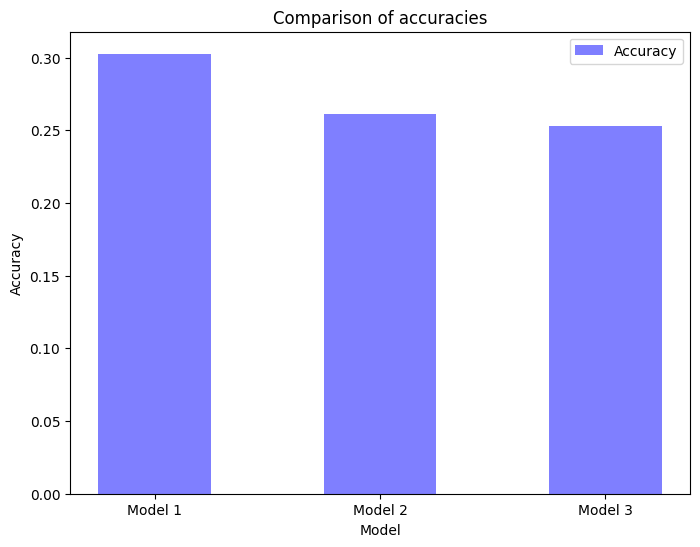

In [ ]:
# Define the data
accuracies = [accuracy1, accuracy2, accuracy3]

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Comparison of accuracies")
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")

# Add the data
x = ['Model 1', 'Model 2', 'Model 3']
ax.bar(x, accuracies, color='b', alpha=0.5, label='Accuracy', width=0.5)

# Add a legend and show the plot
ax.legend()
plt.show()

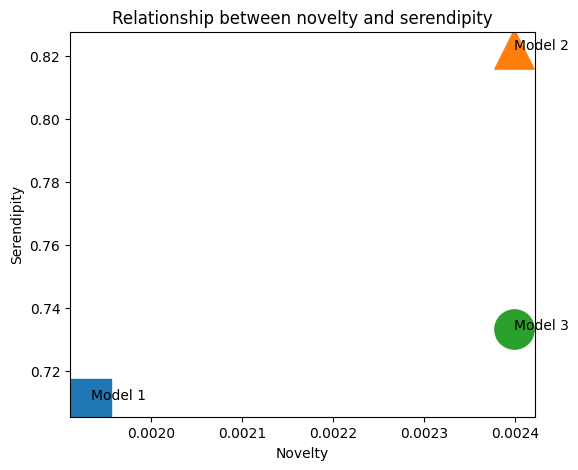

In [ ]:
import matplotlib.pyplot as plt

# Define the data
accuracies = [avg_novelty1, avg_novelty2, avg_novelty2]
novelties = [avg_serendipity1, avg_serendipity2, avg_serendipity3]

# Set up the plot
fig, ax = plt.subplots(figsize=(6, 5))
ax.set_title("Relationship between novelty and serendipity")
ax.set_xlabel("Novelty")
ax.set_ylabel("Serendipity")

# Add the data with different marker shapes for each model
ax.scatter(accuracies[0], novelties[0], s=800, marker='s')
ax.scatter(accuracies[1], novelties[1], s=800, marker='^')
ax.scatter(accuracies[2], novelties[2], s=800, marker='o')

# Add labels to each point
x = ['Model 1', 'Model 2', 'Model 3']
for i, txt in enumerate(x):
    ax.annotate(txt, (accuracies[i], novelties[i]))

# Show the plot
plt.show()

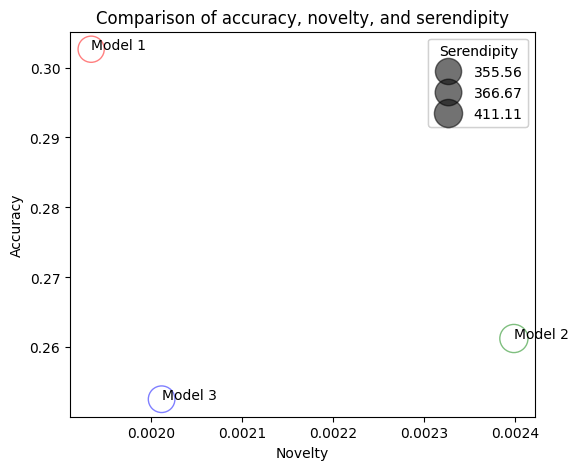

In [ ]:
import matplotlib.pyplot as plt

# Define the data
accuracies = [accuracy1, accuracy2, accuracy3]
novelties = [avg_novelty1, avg_novelty2, avg_novelty3]
serendipities = [avg_serendipity1, avg_serendipity2, avg_serendipity3]

# Set up the plot
fig, ax = plt.subplots(figsize=(6, 5))
ax.set_title("Comparison of accuracy, novelty, and serendipity")
ax.set_xlabel("Novelty")
ax.set_ylabel("Accuracy")

# Add the data
scatter = ax.scatter(novelties, accuracies, s=[s*500 for s in serendipities], alpha=0.5, marker='o', facecolors='none', edgecolors=['red', 'green', 'blue'])

# Add labels to each point
x = ['Model 1', 'Model 2', 'Model 3']
for i, txt in enumerate(x):
    ax.annotate(txt, (novelties[i], accuracies[i]))

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(prop='sizes'), title='Serendipity', loc='upper right')
ax.add_artist(legend1)

# Show the plot
plt.show()

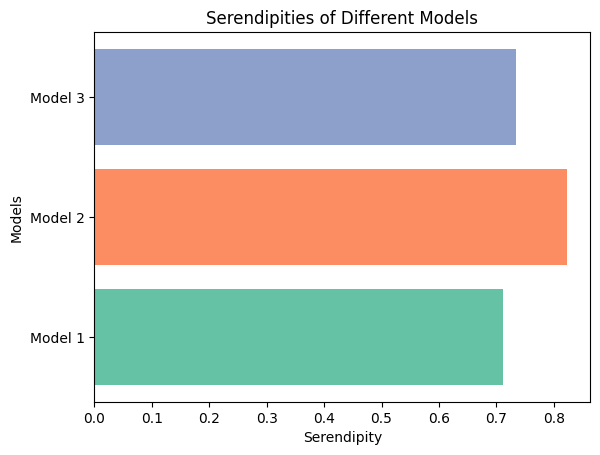

In [ ]:
import matplotlib.pyplot as plt

# Define the serendipities
serendipities = [avg_serendipity1, avg_serendipity2, avg_serendipity3]

# Define the x-axis labels
models = ['Model 1', 'Model 2', 'Model 3']

# Define the colors for each bar
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Create the horizontal bar plot
plt.barh(models, serendipities, color=colors)

# Add titles and labels
plt.title('Serendipities of Different Models')
plt.xlabel('Serendipity')
plt.ylabel('Models')

# Show the plot
plt.show()

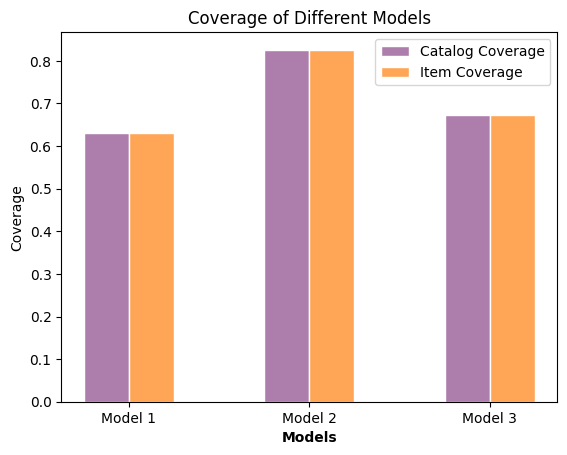

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# define data for three models
catalog_coverage = [catalog_coverage1, catalog_coverage2, catalog_coverage3]
item_coverage = [item_coverage1, item_coverage2, item_coverage3]
models = ['Model 1', 'Model 2', 'Model 3']

# set width of bars
barWidth = 0.25

# Set position of bars on X axis
r1 = np.arange(len(catalog_coverage))
r2 = [x + barWidth for x in r1]

# Define colors
catalog_color = (139/255, 71/255, 137/255, 0.7)  # Faded purple
item_color = (255/255, 128/255, 14/255, 0.7)  # Faded orange

# Make the plot
plt.bar(r1, catalog_coverage, color=catalog_color, width=barWidth, edgecolor='white', label='Catalog Coverage')
plt.bar(r2, item_coverage, color=item_color, width=barWidth, edgecolor='white', label='Item Coverage')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(catalog_coverage))], models)

# Add legend
plt.legend()

# Add y-axis label
plt.ylabel('Coverage')

# Add title
plt.title('Coverage of Different Models')

# Show graphic
plt.show()

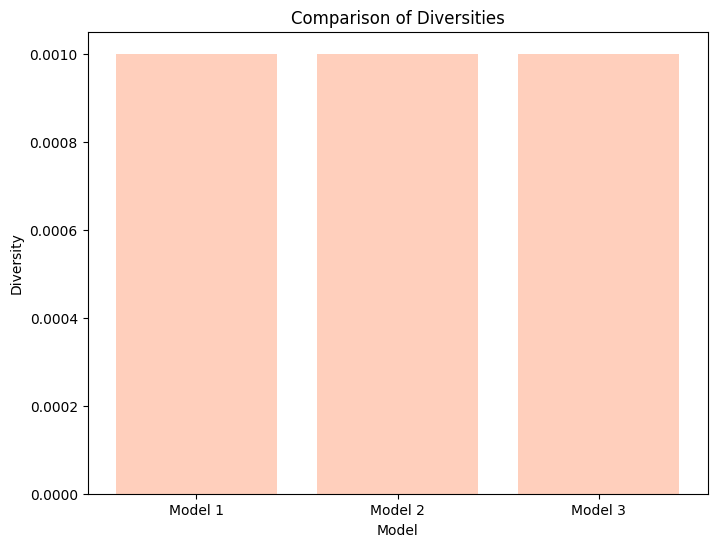

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Comparison of Diversities")
ax.set_xlabel("Model")
ax.set_ylabel("Diversity")

# Define the color
color = (1, 1, 0.5, 0.7) # (R, G, B, Alpha)

# Add the data
x = ['Model 1', 'Model 2', 'Model 3']
ax.bar(x, [0.001, 0.001, 0.001], color='#FFA07A', alpha=0.5)

# Show the plot
plt.show()